1. Manually take confocal image at specified coordinates.
2. Use diff_register code to extract same image from tilescan image.
3. Convert both images to same coordinates.
4. Compare the images using some algorithm (here: https://www.pyimagesearch.com/2014/09/15/python-compare-two-images/)

In [1]:
from diff_register import register as reg
from diff_classifier import aws as aws
import skimage.io as sio
import matplotlib.pyplot as plt
import numpy as np

In [23]:
def registration_validation(tilescan, pointvids, multipoints, remote_folder, pxrat_cells, pxrat_traj,
                            offset=(-7086, -5524), correction=(35, 5), download=False, bucket_name='ccurtis.data'
                            output='testreg.tif'):
    """
    General registration validation function for aligning subimages to a large tilescan image.
    
    Parameters
    ----------
    tilescan : string
        Filename of large tilescan image.
    pointvids : string
        Filename of multipage tiff file containing images to be aligned with tilescan.
        Currently works with xyp data. To be modified to work with xypct (5d) data.
    multipoints : string
        Filename of XML file containing coordinates at which pointvids were collected.
    pxrat_cells : float
        Pixel ratio of tilescan image in microns per pixel.
    pxrat_traj : float
        Pixel ratio of subimages in microns per pixel.
    offset : list of integers or floats
        Coordinates (in microns) of the upper right corner of the input tilescan image.
    correction : list of integers or floats
        Optional xy correction coordinates if alignment doesn't appear to be perfect
    download : Boolean
        Specifies whether files need to be downloaded from s3.
    bucket_name : string
        S3 bucket name containing files to be analyzed.
    output : string
        Desired filename of output image.
    
    Returns
    -------
    

    Examples
    --------
    """
    if download:
        aws.download_s3('{}/{}'.format(remote_folder, tilescan), tilescan, bucket_name=bucket_name)
        aws.download_s3('{}/{}'.format(remote_folder, pointvids), pointvids, bucket_name=bucket_name)
        aws.download_s3('{}/{}'.format(remote_folder, multipoints), multipoints, bucket_name=bucket_name)

    dim_cells = int(np.round(dim_traj*pxrat_traj/pxrat_cells, decimals=0))
    tiled = sio.imread(tilescan)
    pointv = sio.imread(pointvids)
    plots = pointv.shape[0]
    dim_traj = pointv.shape[2]
    
    xmlmod = reg.read_xmlpoints(multipoints, tilescan, converttopix=True, umppx=pxrat_cells, offset=offset)
    
    f, axarr = plt.subplots(plots, plots, figsize=(25, 25))

    for i in range(0, plots):
        subim = reg.crop_to_videodims(tiled, vidpoint=xmlmod[i], dim=dim_cells, fname='test.tif', correction=(35, 5))
        axarr[0, i].imshow(subim, cmap='binary')
        axarr[1, i].imshow(pointv[i, :, :], cmap='binary', vmin=500, vmax=25000)
        axarr[0, i].set_xticks([])
        axarr[0, i].set_yticks([])
        axarr[1, i].set_xticks([])
        axarr[1, i].set_yticks([])

        for j in range(2, plots):
            axarr[j, i].axis('off')

    f.subplots_adjust(hspace=0, wspace=0)
    #f.tight_layout(pad=0.05, w_pad=0.05, h_pad=0.05)
    #plt.show()
    plt.savefig(output)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


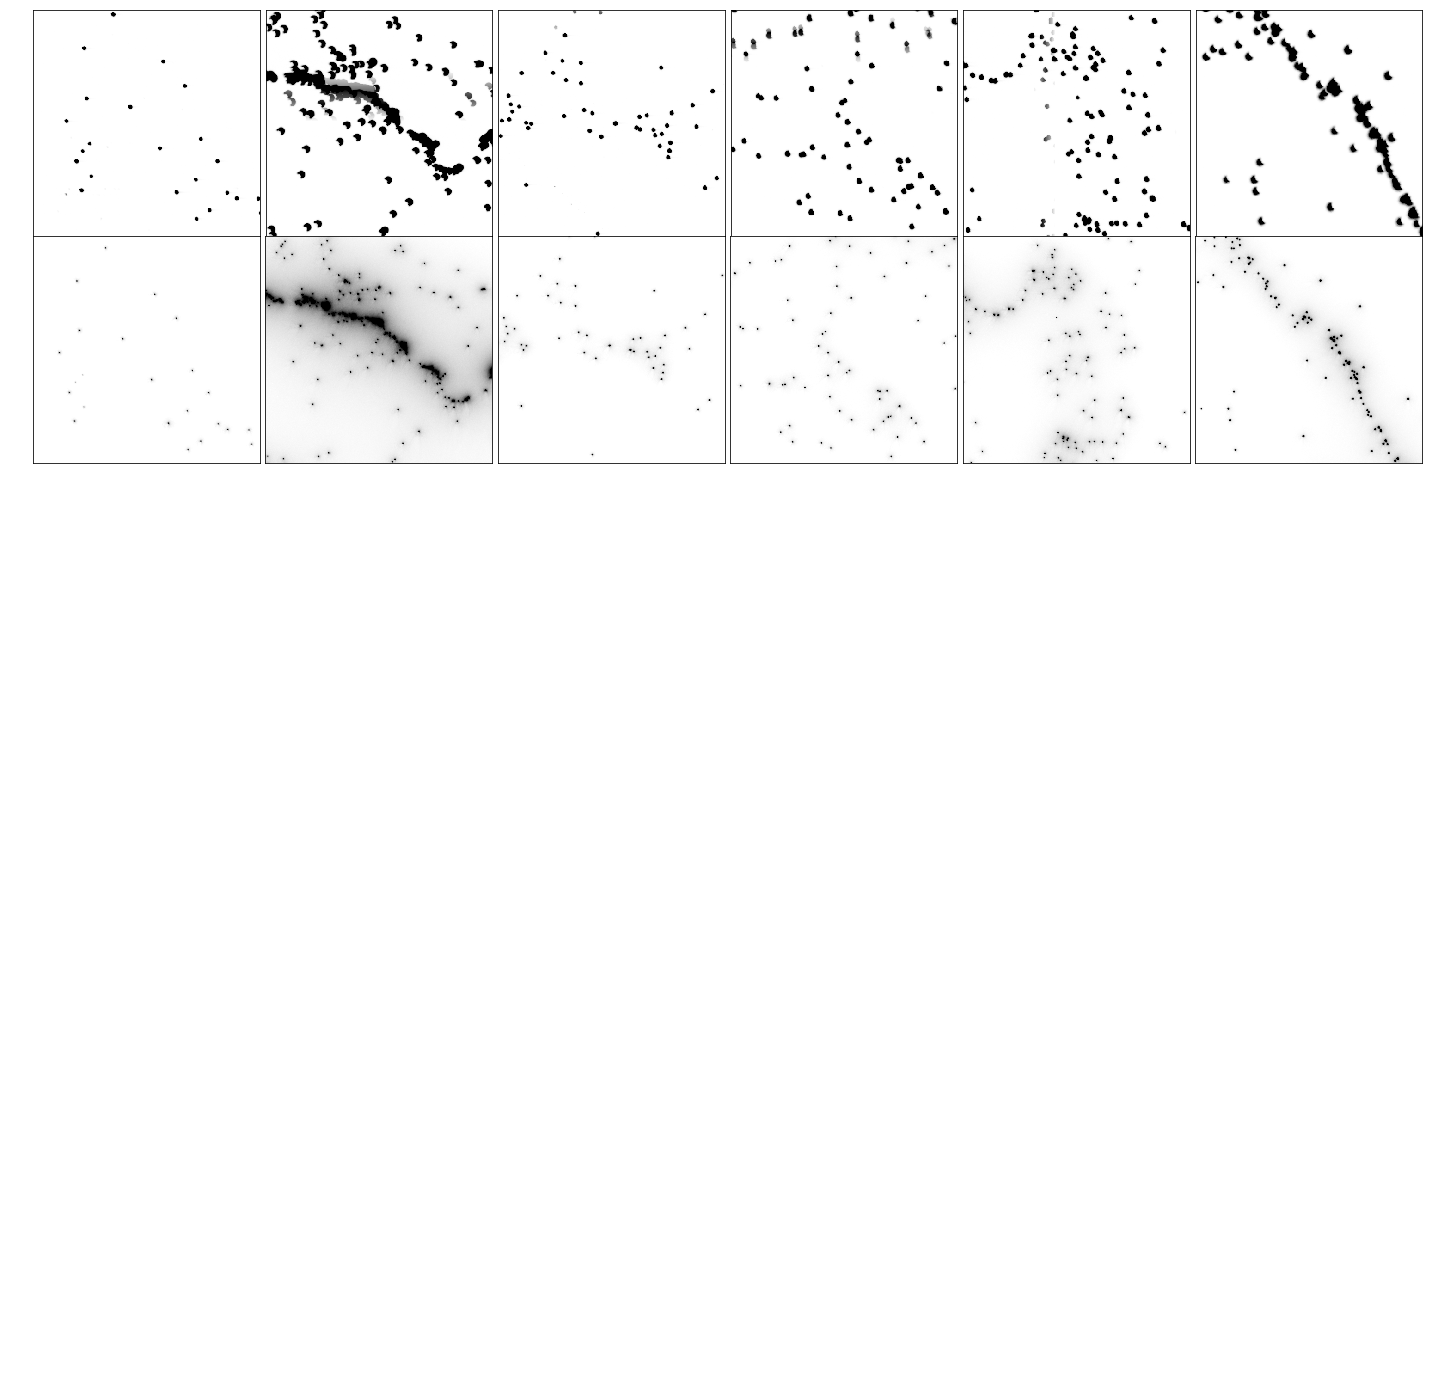

In [24]:
remote_folder = 'Validation/07_20_18_registration_validation'
tilescan = '20x_tilescan.tif'
pointvids = '40x_points.tif'
multipoints = 'multipoints.xml'

pxrat_cells = 1.24
pxrat_traj = 0.16
dim_traj = 2048

registration_validation(tilescan, pointvids, multipoints, remote_folder, pxrat_cells, pxrat_traj, dim_traj)

In [ ]:
reg.read_xmlpoints

In [2]:
#Input parameters. Pixel ratios of input cell tilescales and trajectory vidoes (units of microns per pixel) and image
#dimensions in pixels.

pxrat_cells = 1.24
pxrat_traj = 0.16

dim_traj = 2048
dim_cells = int(np.round(dim_traj*pxrat_traj/pxrat_cells, decimals=0))

In [3]:
dim_cells

264

In [4]:
remote_folder = 'Validation/07_20_18_registration_validation'
tilescan = '20x_tilescan.tif'
pointvids = '40x_points.tif'
multipoints = 'multipoints.xml'

In [ ]:
# aws.download_s3('{}/{}'.format(remote_folder, tilescan), tilescan, bucket_name='ccurtis.data')
# aws.download_s3('{}/{}'.format(remote_folder, pointvids), pointvids, bucket_name='ccurtis.data')
# aws.download_s3('{}/{}'.format(remote_folder, multipoints), multipoints, bucket_name='ccurtis.data')

In [5]:
tiled = sio.imread(tilescan)
pointv = sio.imread(pointvids)

In [6]:
pointv.shape

(6, 2044, 2048)

Check camera small images and confocal tilescans to check quality.

(-0.5, 2047.5, 2043.5, -0.5)

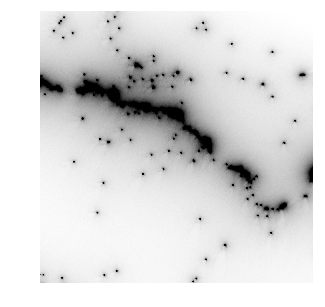

In [7]:
fig = plt.figure(figsize=(5, 5))
plt.imshow(pointv[1, :, :], cmap='binary', vmin=500, vmax=20000)
plt.axis('off')

(-0.5, 2397.5, 2357.5, -0.5)

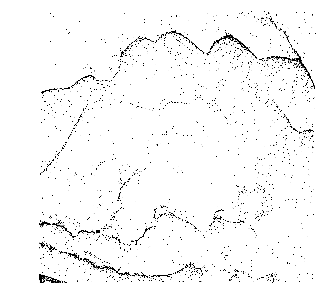

In [8]:
fig = plt.figure(figsize=(5, 5))
plt.imshow(tiled, cmap='binary', vmin=500, vmax=4000)
plt.axis('off')

Convert XML coordinates to pixels. XY values are needed to be coorect. Upper left y coordinate, and bottom right x coordinate
So the correct coordinate to coorect is upper right coordinate is the point to use for transformations.

In [9]:
xmlmod = reg.read_xmlpoints(multipoints, tilescan, converttopix=True, umppx=1.24, offset=(-7086, -5524))

In [ ]:
xmlmod

First correction to xmlpoint function: Reorient xml points (flip essentially).

For some reason, I had to shift the y coordinates over by 25 pixels to get the images to align perfectly.

In [ ]:
type(tiled)

In [ ]:
subim = reg.crop_to_videodims(tiled, vidpoint=xmlmod[2], dim=dim_cells, fname='test.tif', correction=(35, 5))

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.imshow(subim, cmap='binary')
plt.axis('off')

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.imshow(pointv[2, :, :], cmap='binary', vmin=500, vmax=20000)
plt.axis('off')

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


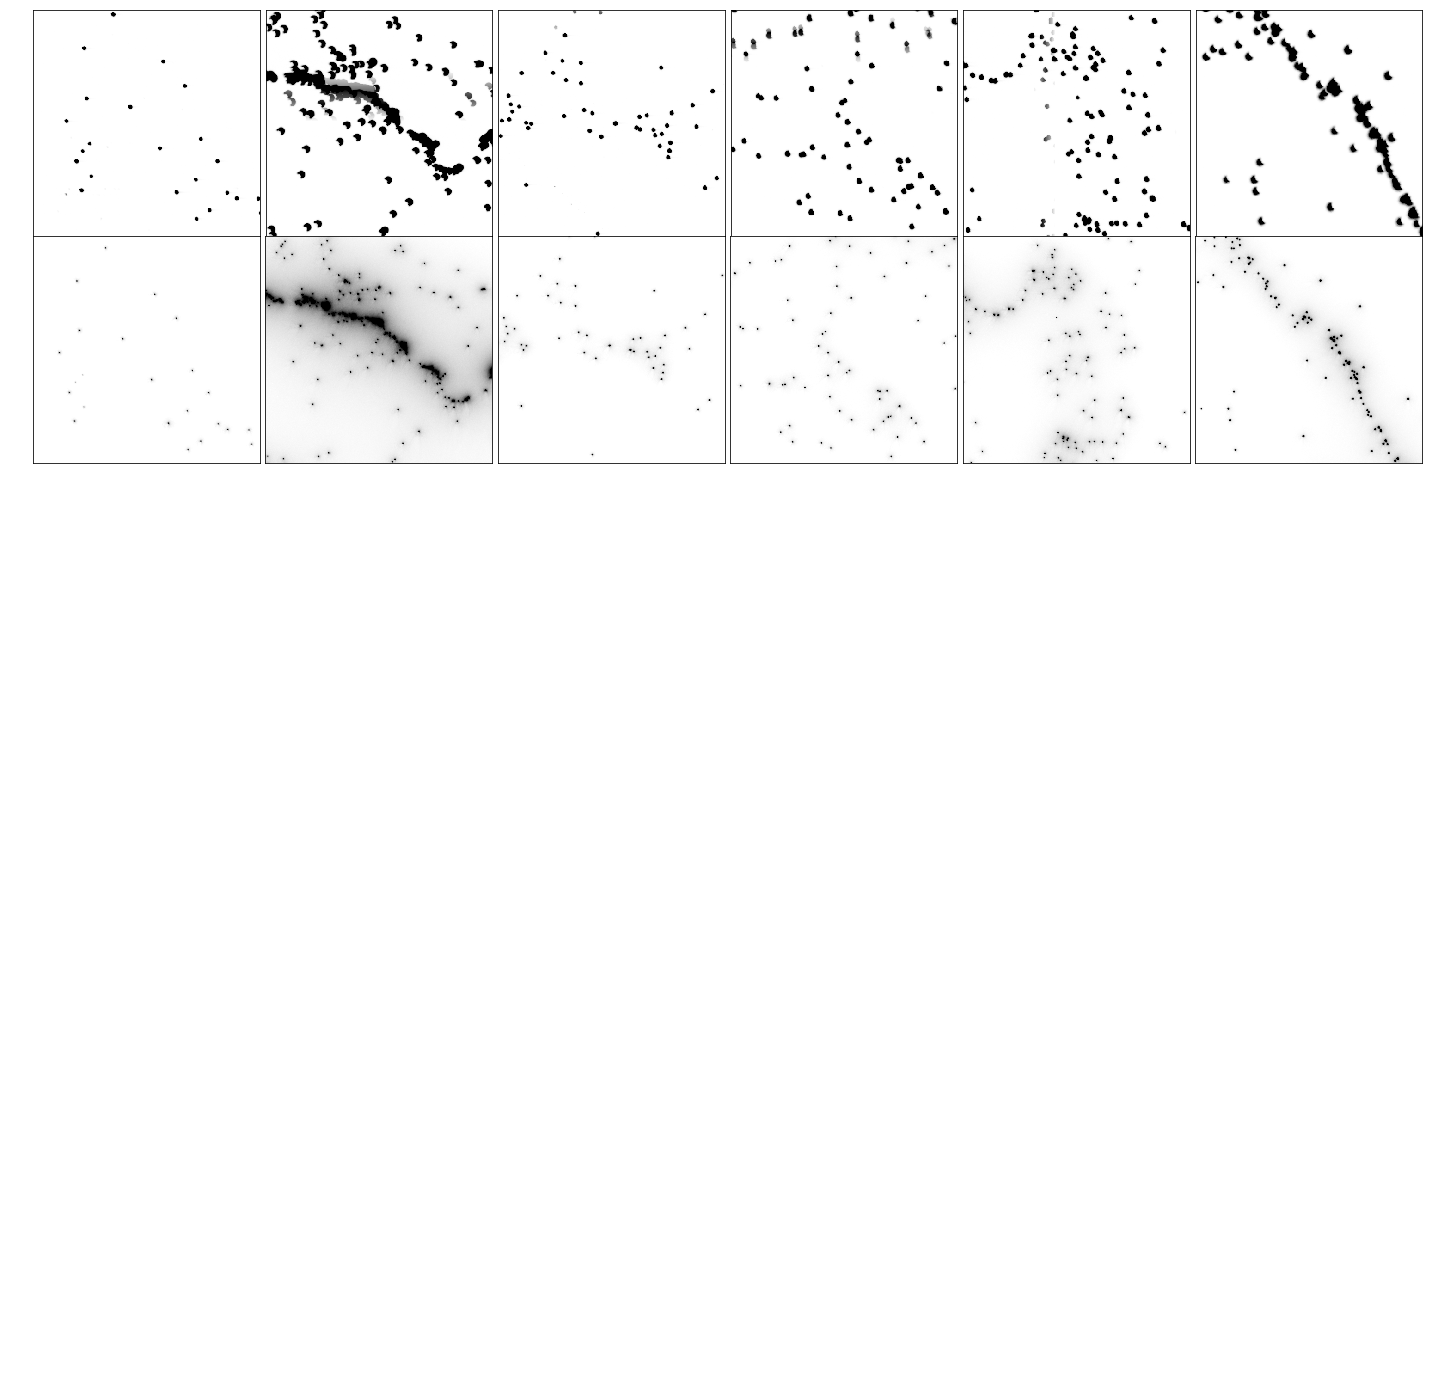

In [20]:
f, axarr = plt.subplots(6, 6, figsize=(25, 25))

for i in range(0, 6):
    subim = reg.crop_to_videodims(tiled, vidpoint=xmlmod[i], dim=dim_cells, fname='test.tif', correction=(35, 5))
    axarr[0, i].imshow(subim, cmap='binary')
    axarr[1, i].imshow(pointv[i, :, :], cmap='binary', vmin=500, vmax=25000)
    axarr[0, i].set_xticks([])
    axarr[0, i].set_yticks([])
    axarr[1, i].set_xticks([])
    axarr[1, i].set_yticks([])
    
    for j in range(2, 6):
        axarr[j, i].axis('off')

f.subplots_adjust(hspace=0, wspace=0)
#f.tight_layout(pad=0.05, w_pad=0.05, h_pad=0.05)
#plt.show()
plt.savefig('testsubplots.png')

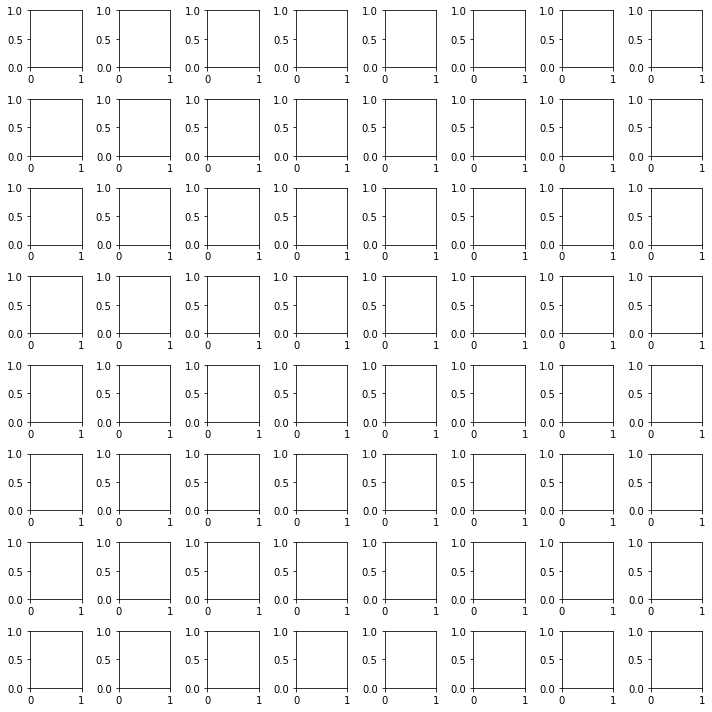

In [17]:
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(10, 10))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.show()